<a href="https://colab.research.google.com/github/perumallamohith/EDA_hotel/blob/main/EDA_Hotel_Booking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!
This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data.
Explore and analyze the data to discover important factors that govern the bookings.

In [ ]:
#Importing all the required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Loading the data set from the Google drive
path = '/content/drive/MyDrive/Almabetter/Hotel Bookings.csv'
df = pd.read_csv(path)

In [ ]:
#Seeing the first 5 rows ( Dataset First Look)
df.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
#Description of Data set
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [ ]:
#Viewing all columns in order
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

###Cleaning the Data Set

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
#Below are data cleaning steps
df['children'] = df['children'].replace(np.nan,0).astype(int)
df['country'] = df['country'].replace(np.nan, 'N/A')
df['agent'] = df['agent'].replace(np.nan,0).astype(int)
df['company'] = df['company'].fillna('N/A')

In [ ]:
#Double checking the our clean was done correctly or not
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119390 non-null  int64  
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
#rechecking our first 5 rows
df.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,0,N/A,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,0,N/A,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,0,N/A,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304,N/A,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240,N/A,0,Transient,98.0,0,1,Check-Out,2015-07-03


###ANALYSIS AND VISUALIZATION FOR EDA


In [ ]:
#Shape of our Data Frame is?
df.shape

(119390, 32)

In [ ]:
#Different hotels in hotels columns and their count
df.hotel.value_counts()

City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64

In [ ]:
#Different customer types and their count
df.customer_type.value_counts()

Transient          89613
Transient-Party    25124
Contract            4076
Group                577
Name: customer_type, dtype: int64

In [ ]:
df['arrival_date_month'].value_counts()

August       13877
July         12661
May          11791
October      11160
April        11089
June         10939
September    10508
March         9794
February      8068
November      6794
December      6780
January       5929
Name: arrival_date_month, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


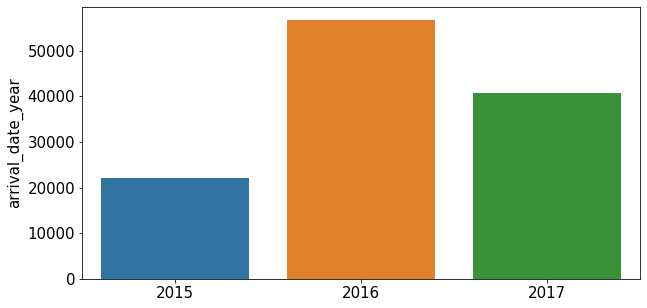

In [ ]:
#Visualizing no.of hotel booking in each year
plt.rcParams['font.size'] = 15
plt.rcParams['figure.figsize'] = (10, 5)
year_index = df['arrival_date_year'].value_counts()
ax = sns.barplot(year_index.index,year_index)

From above chart we can consider that year 2016 has more no.of booking

Text(0.5, 1.0, 'yearly_bookings')

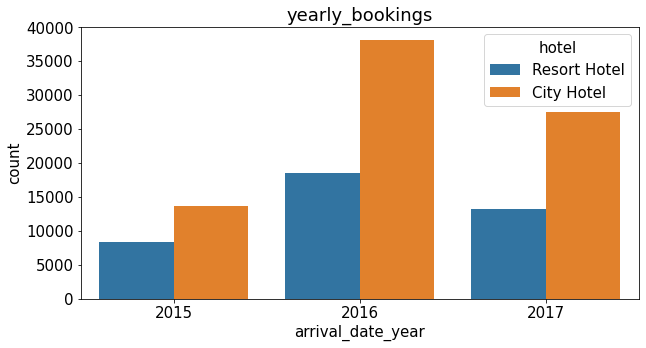

In [ ]:
#Breakingdown no.of booking each year and type of hotel they booked
sns.countplot (x= 'arrival_date_year', data=df , hue= 'hotel').set_title ('yearly_bookings')

We can clearly see that cityhotel has highest no.of booking in years 2015,2016,2017

In [ ]:
df['arrival_date_month'].value_counts()

August       13877
July         12661
May          11791
October      11160
April        11089
June         10939
September    10508
March         9794
February      8068
November      6794
December      6780
January       5929
Name: arrival_date_month, dtype: int64

In [ ]:
#Going much deeper into the yearly sales
year_2015 = df[df['arrival_date_year'] == 2015 ]
year_2016 = df[df['arrival_date_year'] == 2016]
year_2017 = df[df['arrival_date_year'] == 2017]


In [ ]:

counts1 = year_2015['arrival_date_month'].value_counts()
counts2 = year_2016['arrival_date_month'].value_counts()
counts3 = year_2017['arrival_date_month'].value_counts()

In [ ]:
counts1

September    5114
October      4957
August       3889
December     2920
July         2776
November     2340
Name: arrival_date_month, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

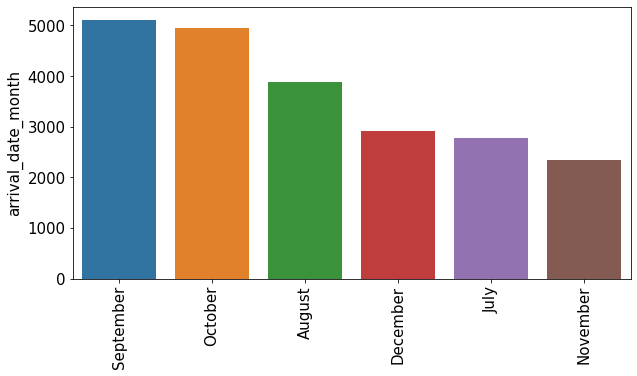

In [ ]:
#Year 2015 monthly sales
sns.barplot(counts1.index, counts1)

plt.xticks(rotation=90)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

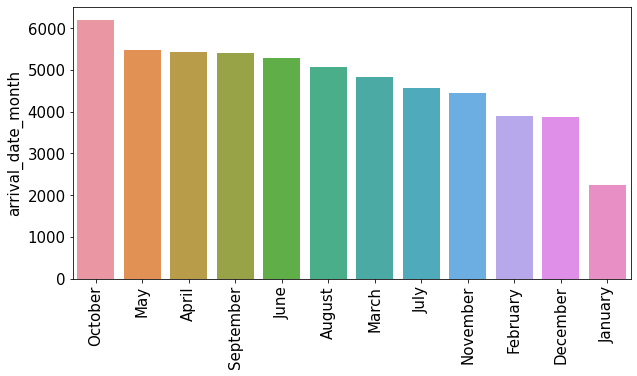

In [ ]:
#Year 2016 monthly sales
sns.barplot(counts2.index, counts2)
plt.xticks(rotation=90)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text major ticklabel objects>)

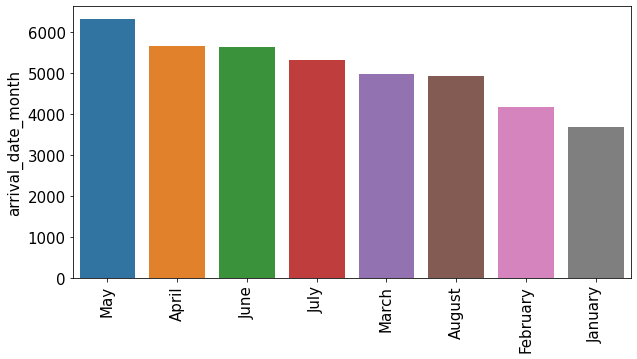

In [ ]:
#Year 2017 monthly sales
sns.barplot(counts3.index, counts3)
plt.xticks(rotation=90)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


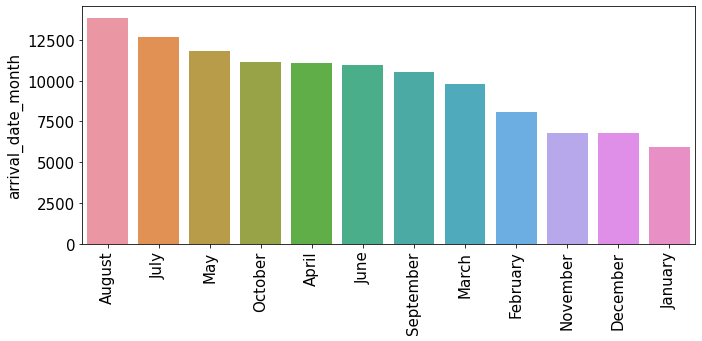

In [ ]:
#Monthly booking for 2016,2017,2018
counts = df['arrival_date_month'].value_counts()
sns.barplot(counts.index, counts)
plt.xticks(rotation=90)
plt.tight_layout()

###We can see on month of August more no.of booking happened


In [ ]:
df[df['arrival_date_month'] == 'August']['arrival_date_day_of_month'].value_counts()

14    632
8     555
17    531
15    527
18    507
3     503
1     502
10    493
12    491
25    486
7     472
20    467
13    465
28    462
5     460
24    459
26    458
16    448
11    437
22    424
19    419
27    415
29    398
4     389
21    388
6     381
31    377
9     351
2     337
30    322
23    321
Name: arrival_date_day_of_month, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


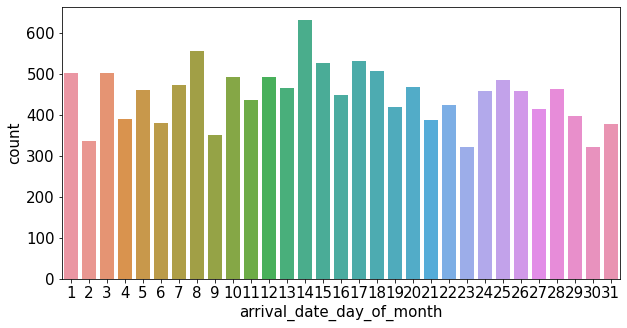

In [ ]:
#Which date is showing more no.of booking in August

#counts = df['arrival_date_month'].value_counts()
sns.countplot(df[df['arrival_date_month'] == 'August']['arrival_date_day_of_month'])


We can clearly see in the August Month on 14th dat most no.of booking and 23rd and 30th of August less no.of booking

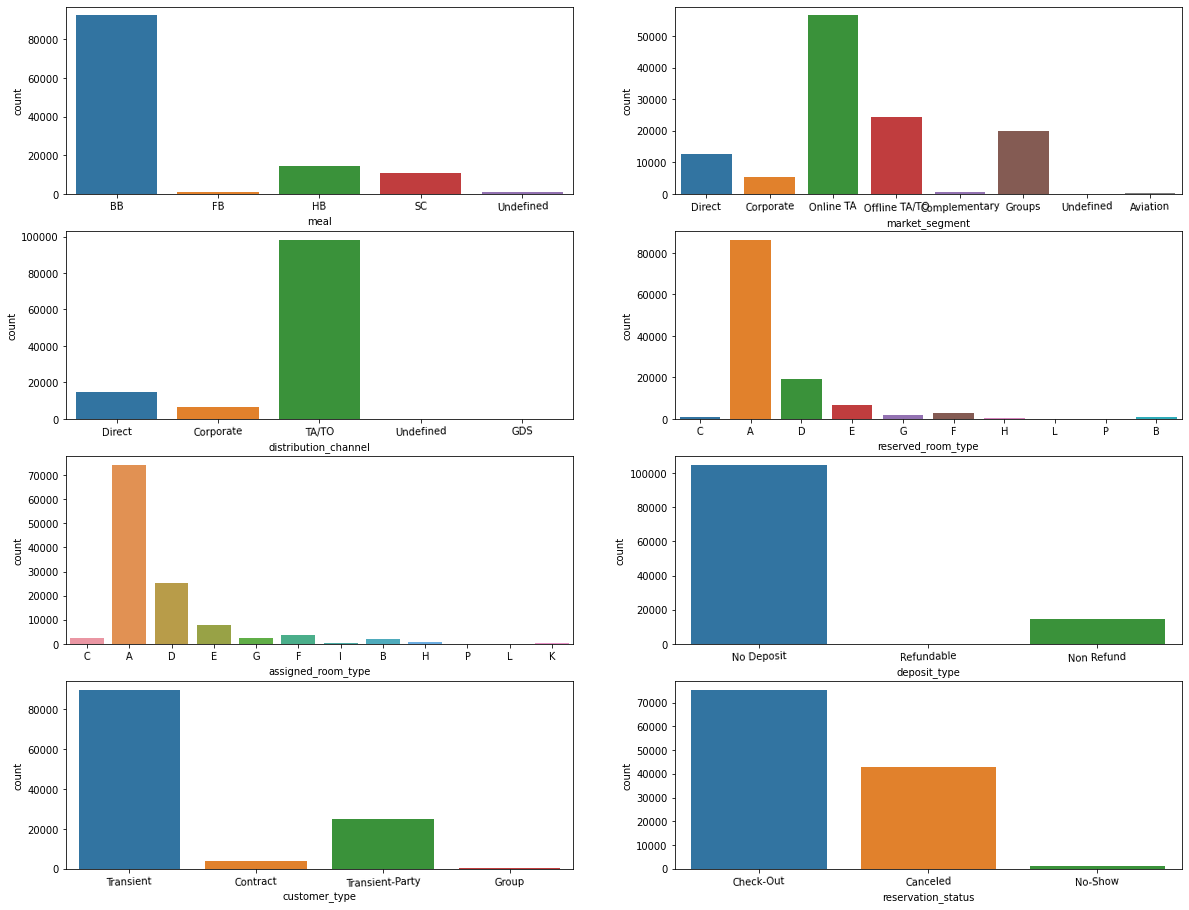

In [ ]:
# Count plot for Categorical variables
lst_count = ['meal', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type', 'reservation_status']
plt.figure(figsize = (20,20))
#sns.set_theme()
for i in enumerate(lst_count):
    plt.subplot(5, 2,i[0]+1)
    sns.countplot(data = df, x = df[i[1]])
    plt.xticks(rotation=2

               )

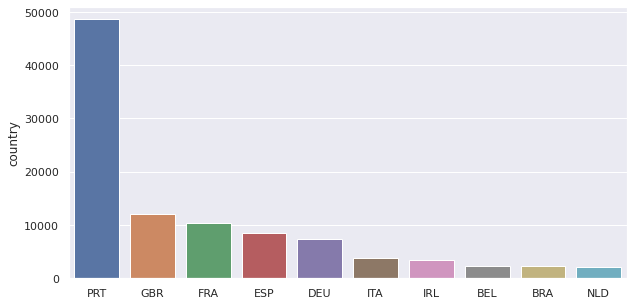

In [ ]:
#Which country makes more no.of Bookings
sns.barplot(x=df.country.value_counts().head(10).index, y=df.country.value_counts().head(10))

###people from Portugal made the highest number of bookings

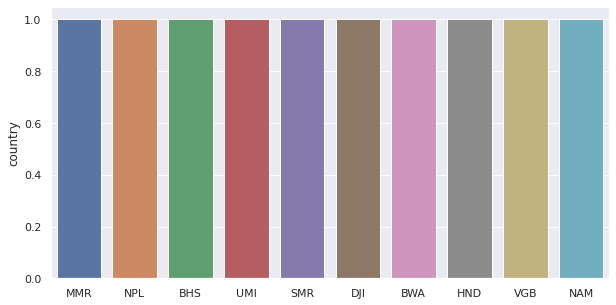

In [ ]:
#Which countries makes less no.of booking
sns.barplot(x=df.country.value_counts().tail(10).index, y=df.country.value_counts().tail(10))

In [ ]:
df_copy = df.copy()

##Pattern of cancellations

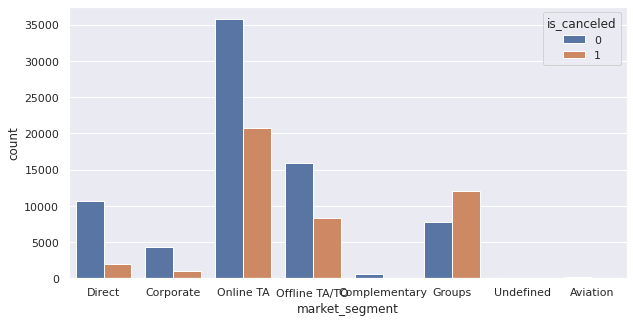

In [ ]:
#relation between market segment and cancellation
sns.countplot(x='market_segment',data=df ,hue='is_canceled')

From above graph we can say that Online TA did more cancellation when compared to other market segments

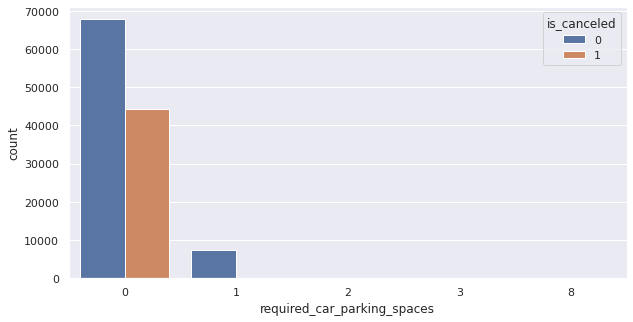

In [ ]:
#relation between required_car_parking and cancellation
sns.countplot(x='required_car_parking_spaces',data=df ,hue='is_canceled')

here we can see that some people are not preferaing the hotel if there is no parking space

In [ ]:
#max no.of days spent
df['max_spent'] = df['stays_in_week_nights'] + df['stays_in_weekend_nights']
df.max_spent.max()


69

3.4279001591423066

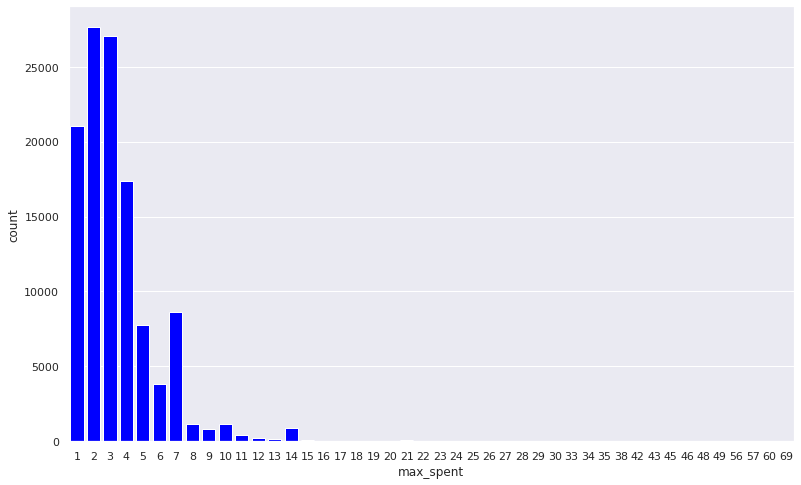

In [ ]:
plt.figure(figsize = (13,8))
sns.countplot(df[df['max_spent']!=0]['max_spent'],facecolor = 'blue')
df.max_spent.mean()
#On an average people preferaning 2 to 3 days and average is 3.4

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


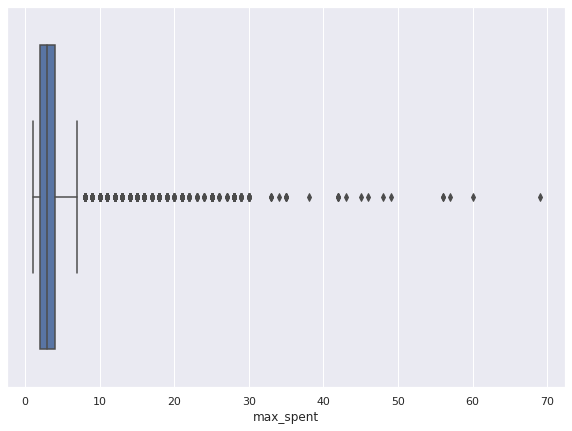

In [ ]:
#visualing in other way(box plot)
plt.figure(figsize = (10,7))
sns.boxplot(df[df['max_spent']!=0]['max_spent'])

In [ ]:
df.head(3)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,0,N/A,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,0,N/A,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,0,N/A,0,Transient,75.0,0,0,Check-Out,2015-07-02


Visualizing booking in pie chat


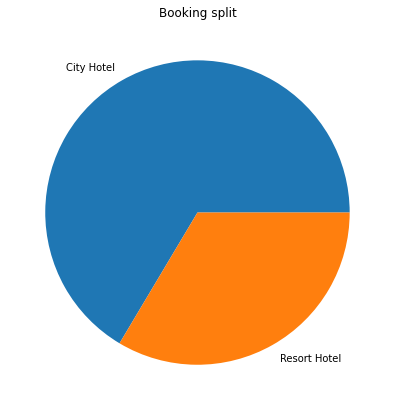

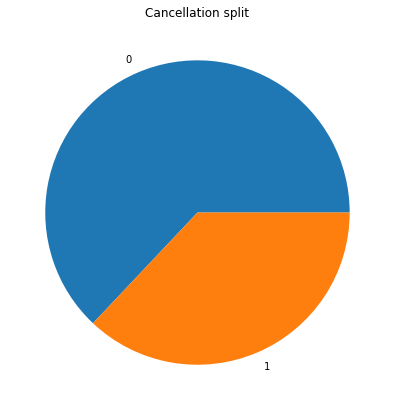

In [ ]:
#booking
values= df['hotel'].value_counts().tolist()
#print(values)
labe = df['hotel'].value_counts().index.tolist()
#print(labe)

plt.title('Booking split')
plt.pie(values ,labels=labe)
plt.show()

#cancellation
values_c = df['is_canceled'].value_counts().tolist()
label_c =df['is_canceled'].value_counts().index.tolist()
plt.title('Cancellation split')
plt.pie(values_c ,labels=label_c)
plt.show()

plotting no of previous cancellations against the number of cancellations

<AxesSubplot:xlabel='previous_cancellations', ylabel='is_canceled'>

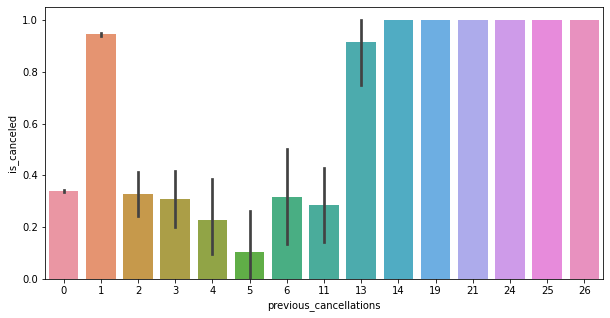

In [ ]:
#how frequent are the previous cancelers in this cancelling hotels
plt.rcParams['figure.figsize'] = (10, 5)
sns.barplot(x= "previous_cancellations" ,y = "is_canceled", data = df_copy)



Lead time vs cancellation

<AxesSubplot:xlabel='lead_time', ylabel='mean'>

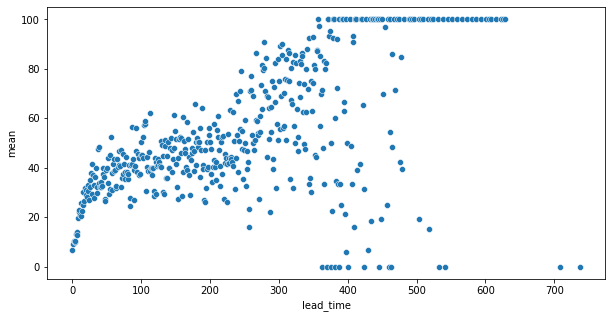

In [ ]:
a = df_copy.groupby("lead_time")['is_canceled'].describe()
sns.scatterplot(x=a.index, y=a["mean"] * 100)

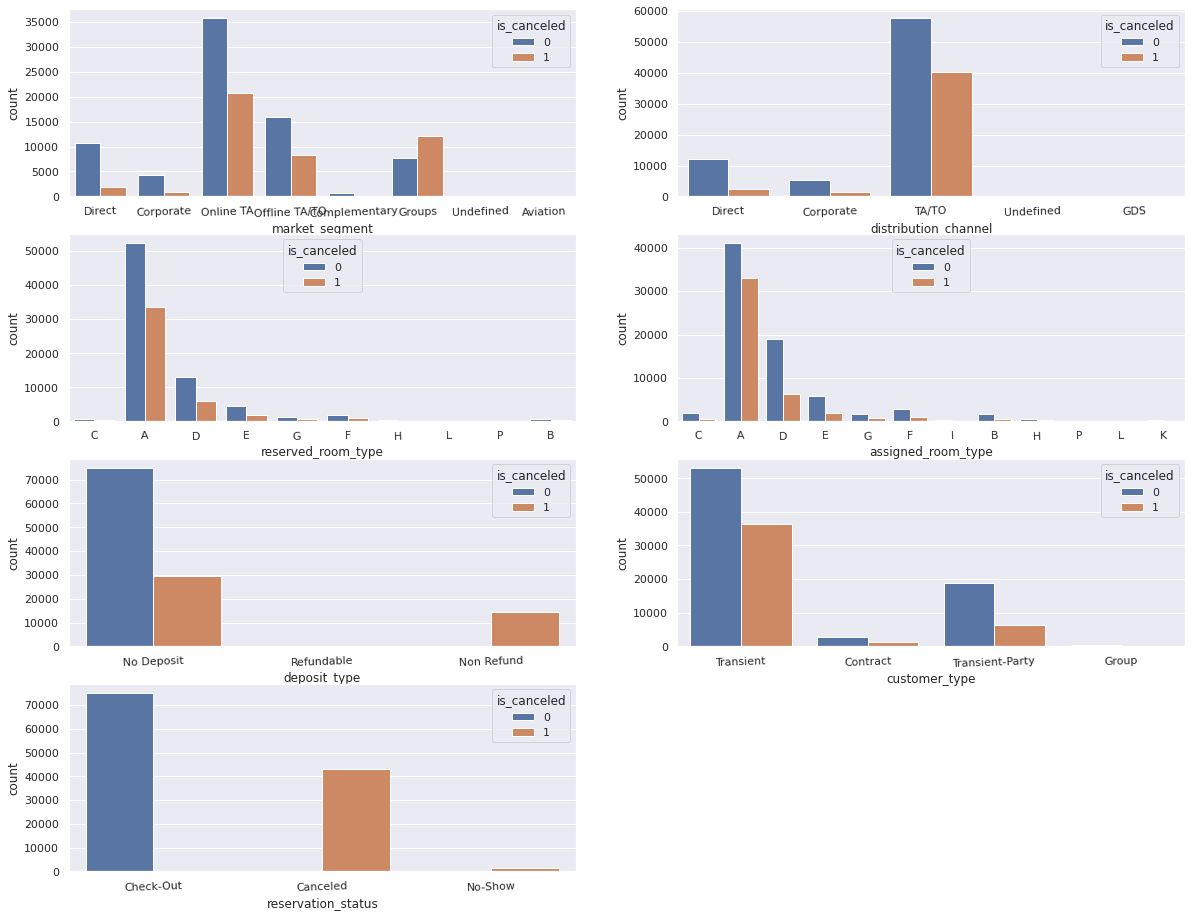

In [ ]:
lst_count = ['market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type']
plt.figure(figsize = (20,20))
sns.set_theme()
for i in enumerate(lst_count):
    plt.subplot(5, 2,i[0]+1)
    sns.countplot(data = df, x = df[i[1]],hue = 'is_canceled')
    plt.xticks(rotation=2)


Overall visitiors to the hotel

In [ ]:
#we need to sum babies,adults, children in order to know total vistiors.
df['total_visitors'] = df['adults'] + df['children'] + df['babies']
df['total_visitors'].value_counts()

2     82051
1     22581
3     10495
4      3929
0       180
5       137
26        5
12        2
27        2
20        2
10        2
40        1
50        1
55        1
6         1
Name: total_visitors, dtype: int64

<AxesSubplot:xlabel='total_visitors', ylabel='count'>

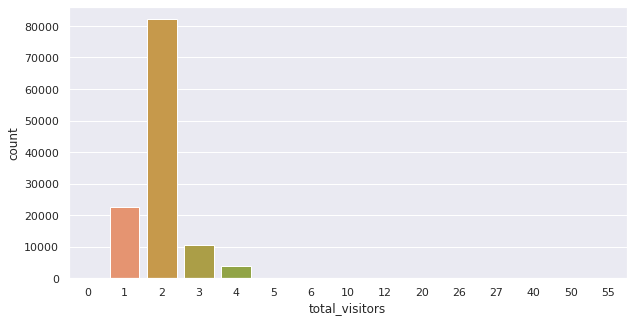

In [ ]:
sns.countplot(data = df, x = df['total_visitors'])

from above graph we can see 2 people are coming more to hotels

In [ ]:
df['adr_pp']= df.adr/df.total_visitors

/usr/local/lib/python3.9/dist-packages/numpy/lib/function_base.py:4486: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


<AxesSubplot:xlabel='reserved_room_type', ylabel='adr_pp'>

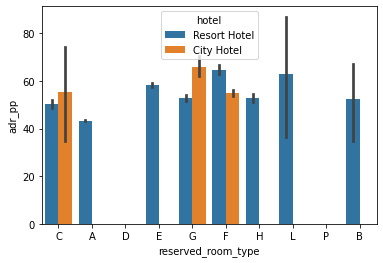

In [ ]:
# plotting variation in adr with room type

sns.barplot(data = df, x = 'reserved_room_type', y = 'adr_pp', hue = 'hotel')


#Conclusion

*Year 2016 has most no of bookings

*People are choosing City hotel when compared to Resort hotel

*Month of August has more no.of Bookings

*Online TA did more cancellation when compared to other market segments

*some people are not preferaing the hotel if there is no parking space

*Portugal sends most number of visitors in different hotels

*people who have made a cancellation previously are much likely to cancel their bookings

*lead time is directly proportional to no of cancellations

*online bookings and the bookings with refundable deposit type has the most chances of cancellation.

*Mostly 2 members are comming to hotel
